In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel("data/FAIRUZSIREGAR.xlsx",index_col="ID")
df.head()

,FVF,Perm,Produc,Refpres,Visc,thicknes,BHP,SLOPE,skin
ID,,,,,,,,,
1,1.21,86.631,2500,6009,0.92,23.0,5905.4502,227.108079,-3.125783
2,1.09,86.631,2580,5849,0.72,25.0,5820.2031,152.014812,-2.016767
3,1.33,85.031,2420,5849,1.08,24.2,5485.8428,274.674695,-3.468039
4,1.17,87.831,2700,6169,0.92,21.4,6132.3521,251.418015,-3.373727
5,1.01,86.231,2540,5969,1.12,22.2,5936.1113,244.049126,-3.198179


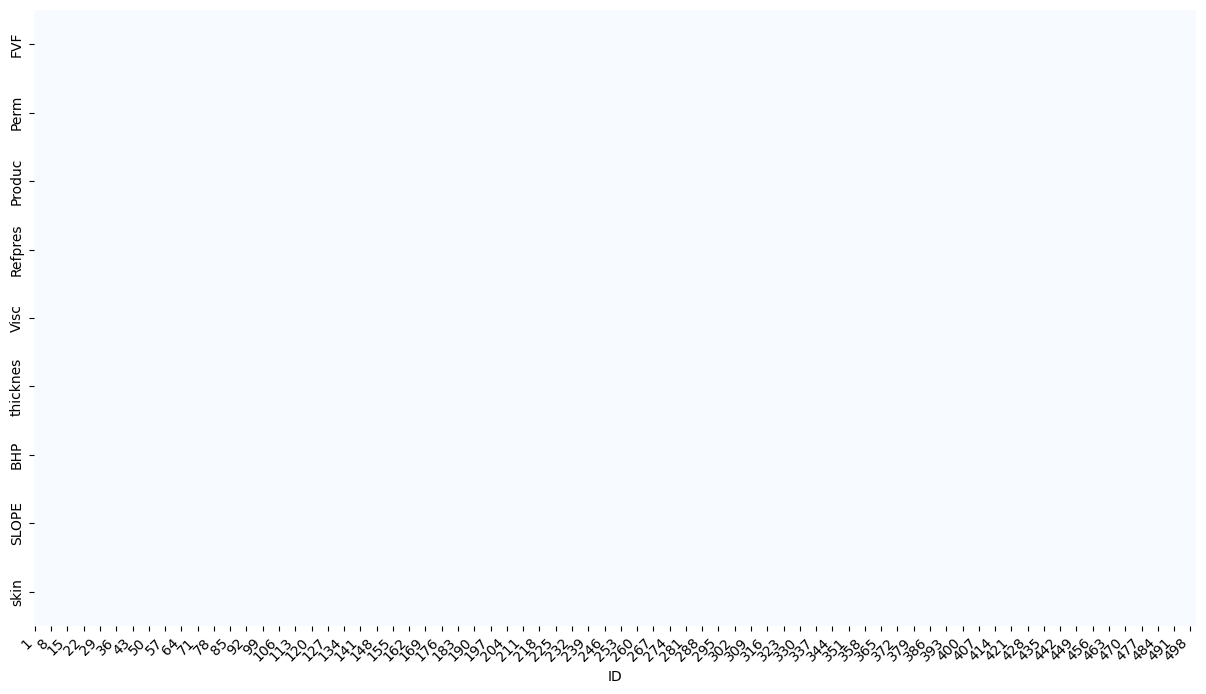

In [3]:
plot_missing_value(df)

In [4]:
df.columns

Index(['FVF', 'Perm', 'Produc', 'Refpres', 'Visc', 'thicknes', 'BHP', 'SLOPE',
       'skin'],
      dtype='object')

In [5]:
df.drop(columns = (['BHP']), inplace = True)

In [6]:
df.tail(10)

,FVF,Perm,Produc,Refpres,Visc,thicknes,SLOPE,skin
ID,,,,,,,,
491,1.024,87.511,2348,6209,1.024,24.72,185.057817,-2.510776
492,1.014,87.891,2310,6199,1.024,24.66,179.942171,-2.425959
493,1.042,87.871,2318,6207,0.970,24.84,174.532482,-2.355402
494,1.022,88.171,2314,6203,0.968,24.94,169.273094,-2.257340
495,1.022,87.591,2300,6209,1.000,24.28,179.717805,-2.432179
496,1.012,87.731,2316,6205,0.996,24.84,174.178392,-2.334784
497,1.012,87.931,2308,6203,0.966,24.84,167.965614,-2.230974
498,1.016,87.551,2304,6207,0.908,24.82,159.044877,-2.070690
499,1.048,87.891,2316,6209,0.968,24.90,174.562914,-2.357113


In [7]:
df.head()

,FVF,Perm,Produc,Refpres,Visc,thicknes,SLOPE,skin
ID,,,,,,,,
1,1.21,86.631,2500,6009,0.92,23.0,227.108079,-3.125783
2,1.09,86.631,2580,5849,0.72,25.0,152.014812,-2.016767
3,1.33,85.031,2420,5849,1.08,24.2,274.674695,-3.468039
4,1.17,87.831,2700,6169,0.92,21.4,251.418015,-3.373727
5,1.01,86.231,2540,5969,1.12,22.2,244.049126,-3.198179


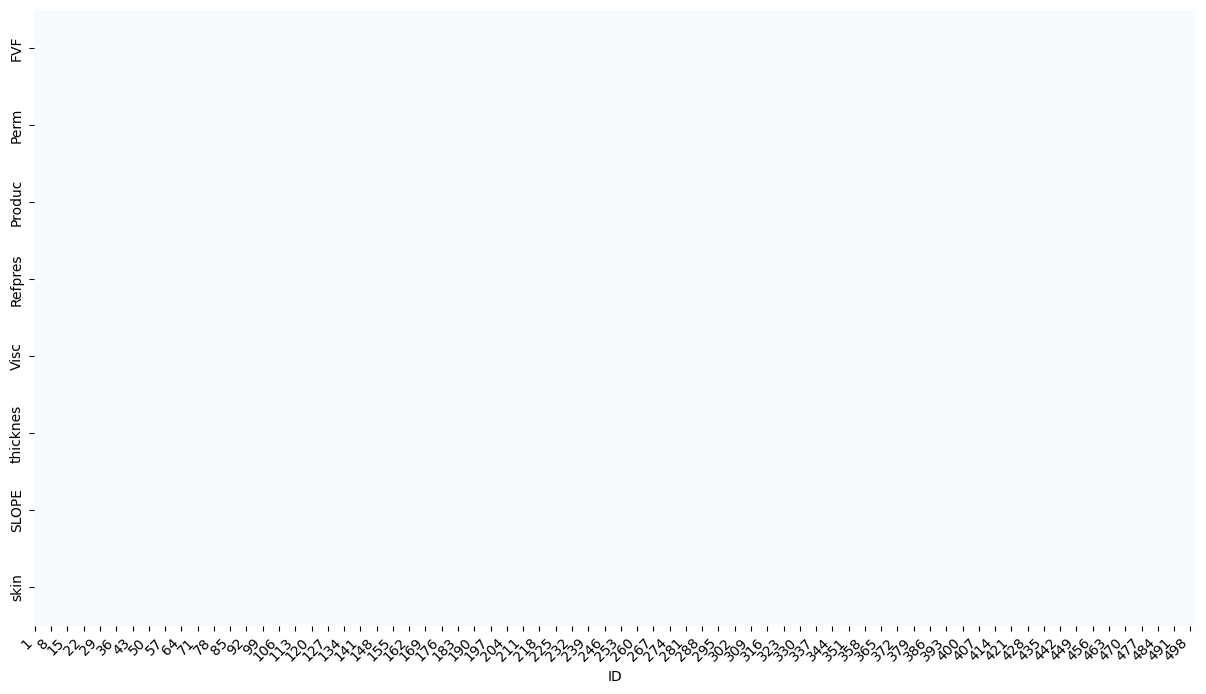

In [8]:
plot_missing_value(df)

<AxesSubplot: >

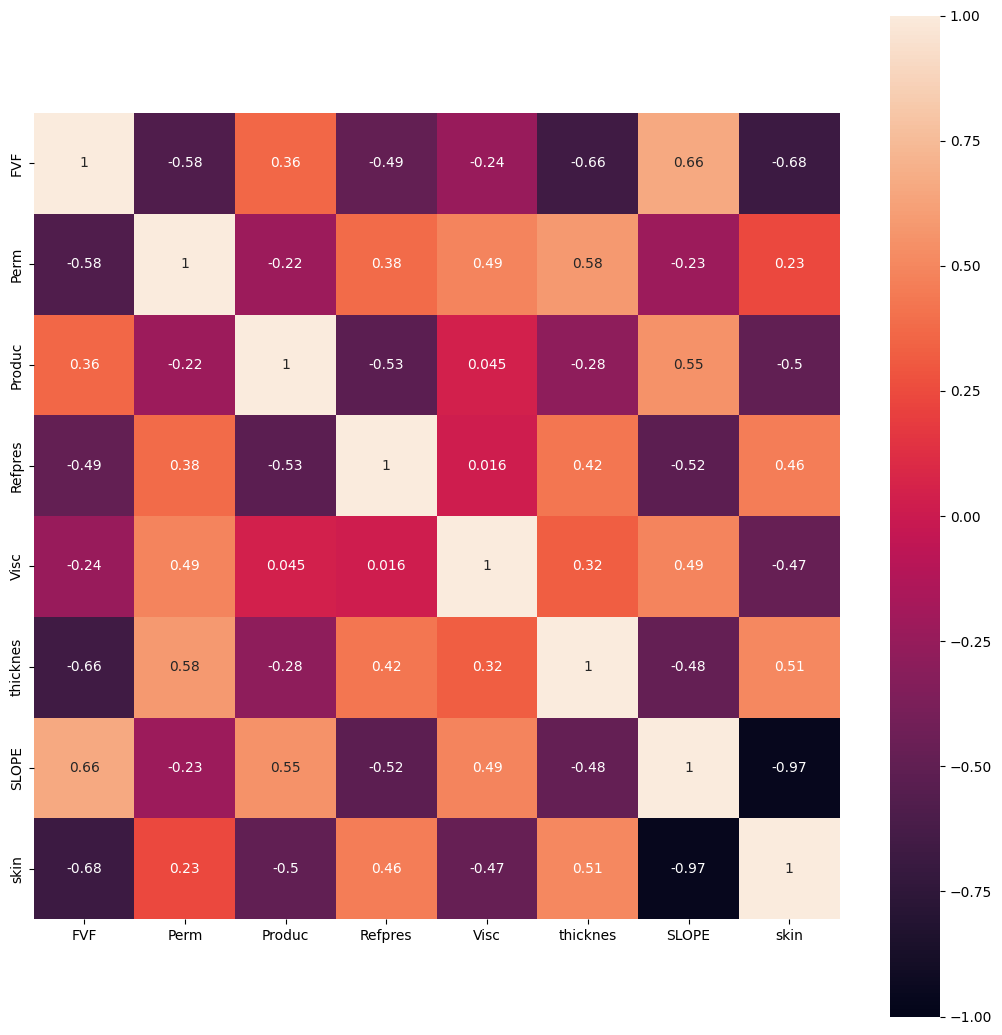

In [9]:
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr(), cbar='false', vmin=-1, vmax=1, annot=True, square=True)

array([[<AxesSubplot: title={'center': 'FVF'}>,
        <AxesSubplot: title={'center': 'Perm'}>,
        <AxesSubplot: title={'center': 'Produc'}>],
       [<AxesSubplot: title={'center': 'Refpres'}>,
        <AxesSubplot: title={'center': 'Visc'}>,
        <AxesSubplot: title={'center': 'thicknes'}>],
       [<AxesSubplot: title={'center': 'SLOPE'}>,
        <AxesSubplot: title={'center': 'skin'}>, <AxesSubplot: >]],
      dtype=object)

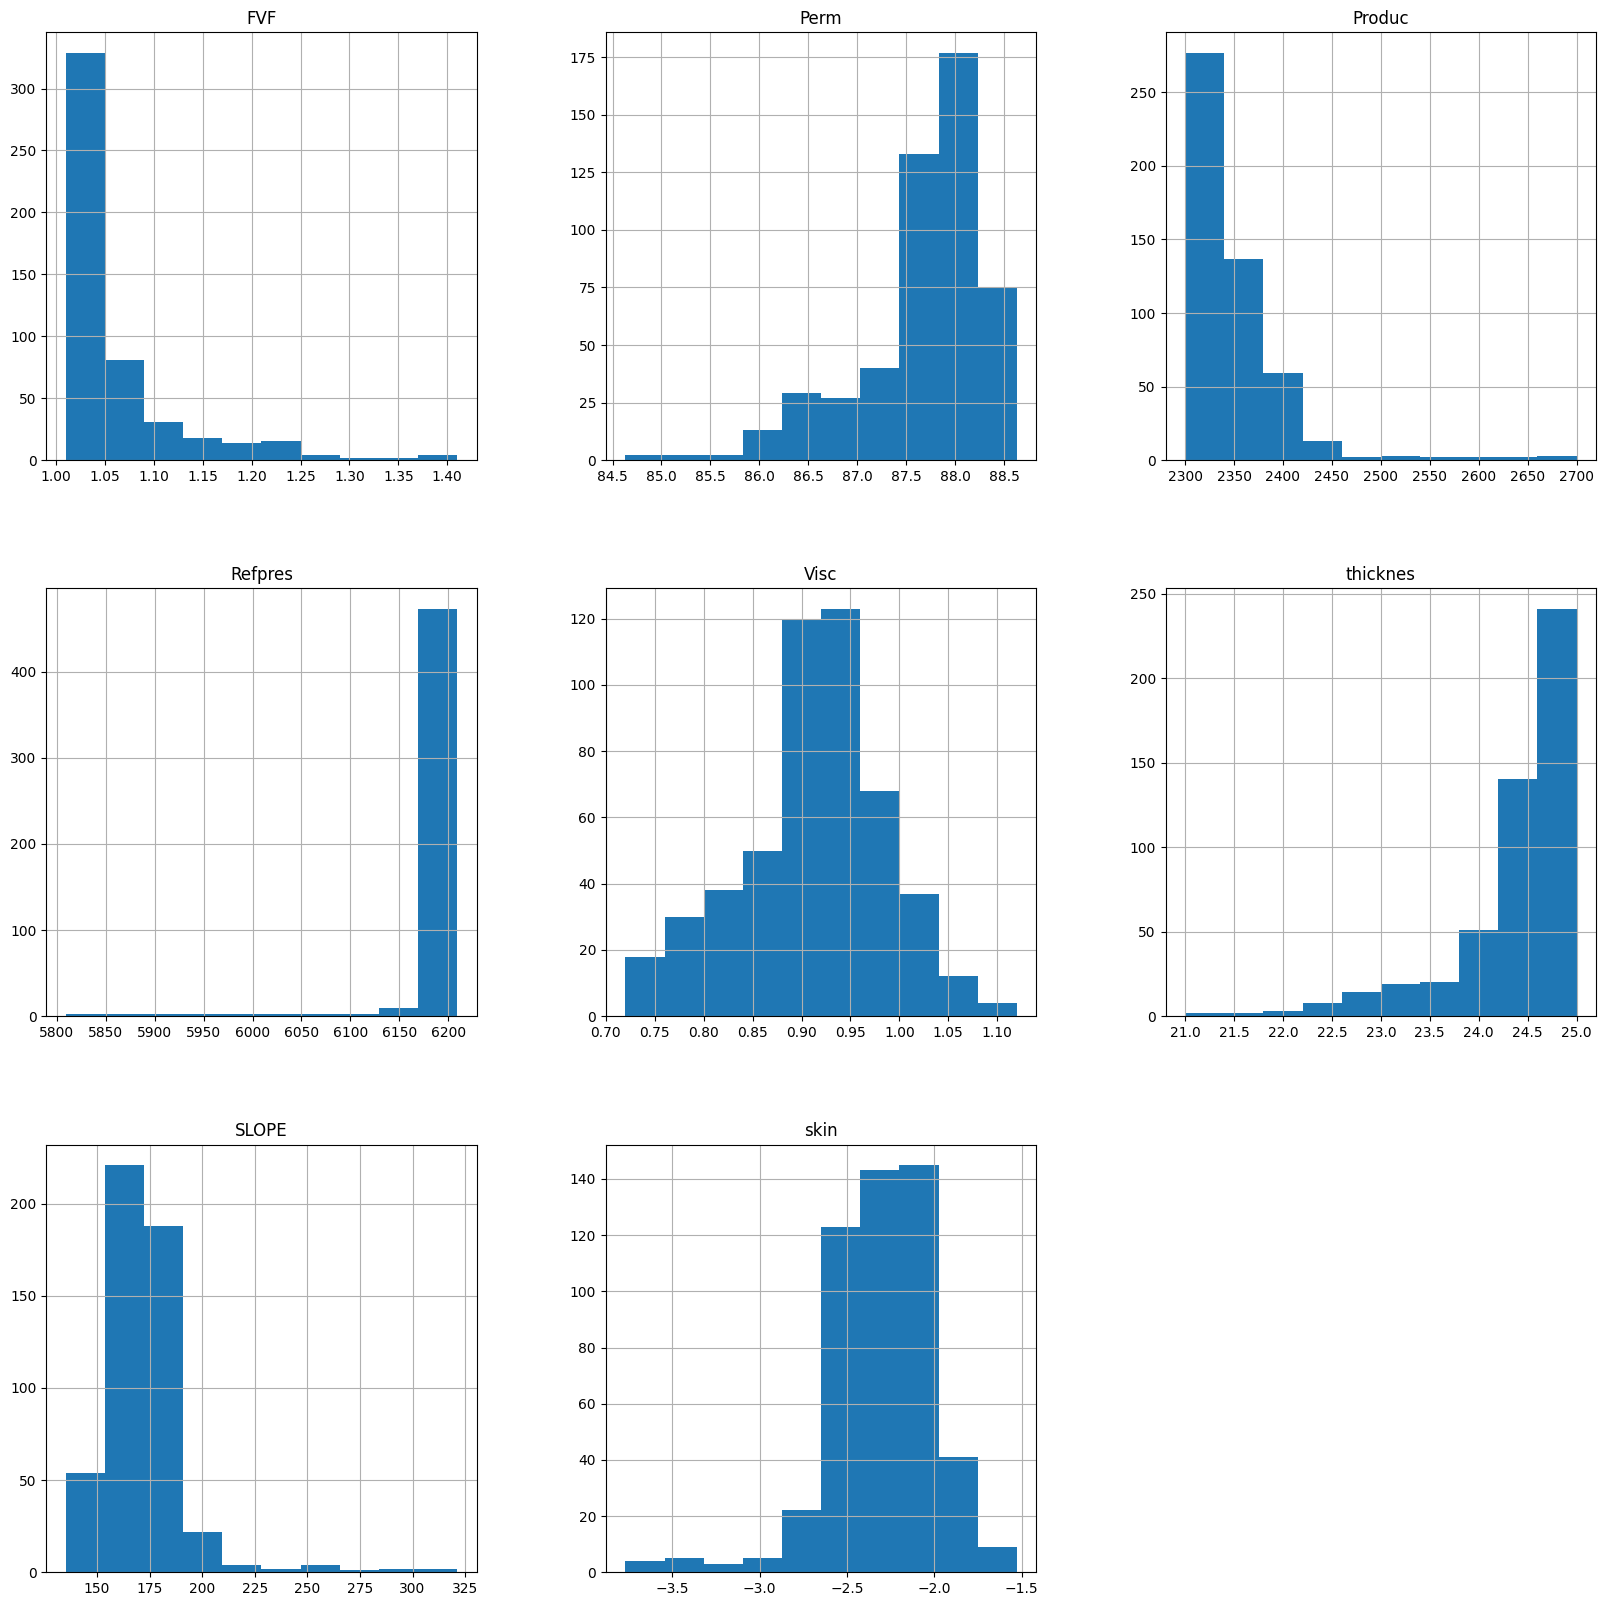

In [10]:
df.hist(figsize=(20, 20))

In [11]:
X = df.drop(columns="skin")
y = df.skin

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [13]:
X_train.columns

Index(['FVF', 'Perm', 'Produc', 'Refpres', 'Visc', 'thicknes', 'SLOPE'], dtype='object')

In [14]:
rsp.svm_poly_params

{'prep__numeric__poly__degree': Integer(low=1, high=3),
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

In [15]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax', poly =1 ), X.columns )])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_SVM = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_SVM.fit(X_train, y_train)

print(model_SVM.best_params_)
print(model_SVM.score(X_train, y_train), model_SVM.best_score_, model_SVM.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 12.746711578215054, 'algo__gamma': 0.4374364439939081}
0.9685741839004941 0.9530086183367968 0.9728302581338266


In [16]:
model_SVM.score(X_train, y_train), model_SVM.score(X_test, y_test)

(0.9685741839004941, 0.9728302581338266)

In [17]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual

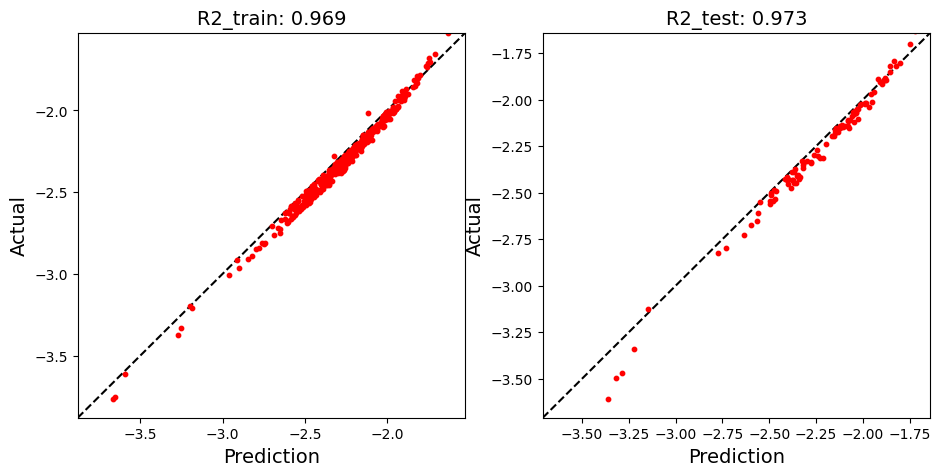

In [18]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_SVM)

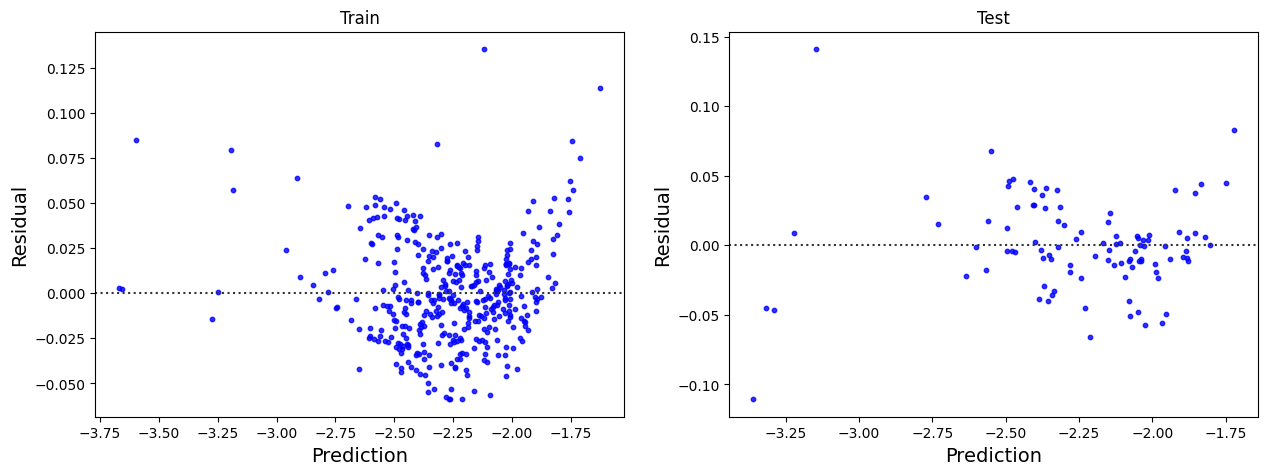

In [19]:
plot_residual(X_train, y_train, X_test, y_test, model_SVM)

In [20]:
from jcopml.feature_importance import mean_loss_decrease
from jcopml.feature_importance import mean_score_decrease

In [21]:
X_train.iloc[:1]

,FVF,Perm,Produc,Refpres,Visc,thicknes,SLOPE
ID,,,,,,,
250,1.014,88.271,2364,6195,1.002,24.76,178.691956


In [22]:
X_pred = pd.DataFrame([[1.014, 88.271, 2364, 6195, 1.002, 24.76, 178.6920]], columns=X_train.columns)
X_pred

,FVF,Perm,Produc,Refpres,Visc,thicknes,SLOPE
0,1.014,88.271,2364,6195,1.002,24.76,178.692


In [23]:
model_SVM.predict(X_pred)

array([-2.39706126])

,feature,importance,stdev
4,Visc,0.628099,0.022768
0,FVF,0.384062,0.011700
6,SLOPE,0.144944,0.005129
5,thicknes,0.124358,0.005018
2,Produc,0.046436,0.002125
1,Perm,0.003398,0.000229
3,Refpres,0.001691,0.000215


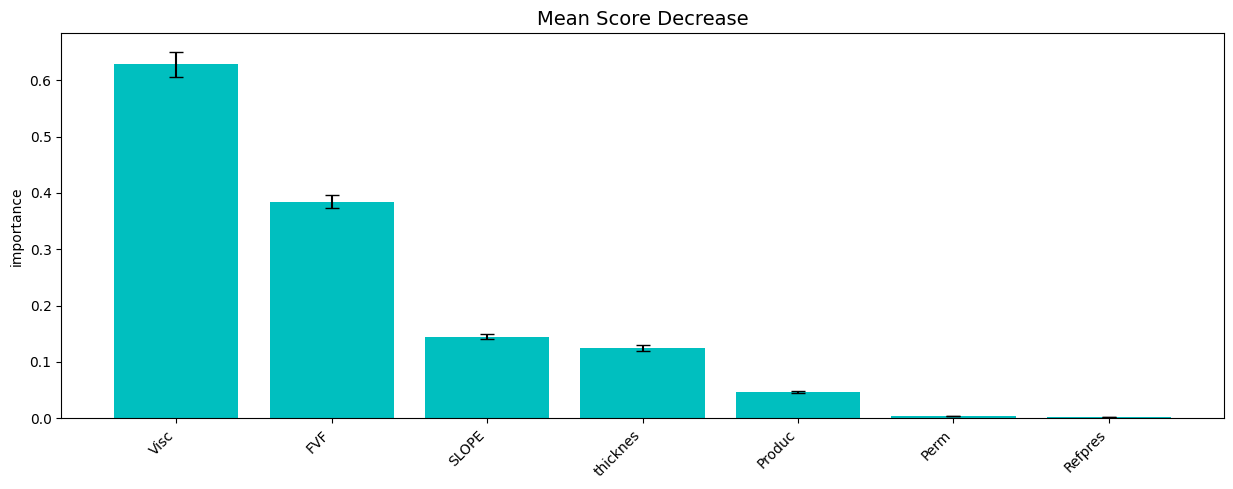

In [24]:
mean_score_decrease(X_train, y_train, model_SVM, plot = True, topk = None)

In [25]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['FVF', 'Produc', 'Refpres', 'thicknes', 'Visc', 'Perm', 'SLOPE']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_MAE = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, scoring= 'neg_mean_absolute_error', n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_MAE.fit(X_train, y_train)

print(model_MAE.best_params_)
print(model_MAE.score(X_train, y_train), model_MAE.best_score_, model_MAE.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 3.5849855803404798, 'algo__gamma': 0.0018997763474111289}
-0.05687127422050388 -0.07962623888953609 -0.11850709190373208


In [26]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['FVF', 'Produc', 'Refpres', 'thicknes', 'Visc', 'Perm', 'SLOPE']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_MSE = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, scoring= 'neg_mean_squared_error', n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_MSE.fit(X_train, y_train)

print(model_MSE.best_params_)
print(model_MSE.score(X_train, y_train), model_MSE.best_score_, model_MSE.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 3.5849855803404798, 'algo__gamma': 0.0018997763474111289}
-0.004130639423715168 -0.02326457561399864 -0.040926830670414534


In [27]:
save_model(model_SVM, "Predict_Effective-Oil-Skin_s")

Model is pickled as model/Predict_Effective-Oil-Skin_s


In [28]:
K_test = model_SVM.predict(X_test)
K_train = model_SVM.predict(X_train)

In [29]:
load_model('model/Predict_Effective-Oil-Skin_s')

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               Index(['FVF', 'Perm', 'Produc', 'Refpres', 'Visc', 'thicknes', 'SLOPE'], dtype='object'))])),
                                             ('algo', SVR(max_iter=500))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'algo__C': Real(low=-3, high=3, prior='log-uniform'),
                                        'algo__gamma': Real(low=-3, high=3, prior='log-uniform')},
                   random_state=42, verbose=1)

In [30]:
X_train.head()

,FVF,Perm,Produc,Refpres,Visc,thicknes,SLOPE
ID,,,,,,,
250,1.014,88.271,2364,6195,1.002,24.76,178.691956
434,1.026,88.051,2318,6201,0.912,24.86,161.116773
20,1.370,87.431,2380,6209,0.920,23.80,234.403175
323,1.024,87.931,2328,6209,0.908,24.80,161.397064
333,1.024,87.671,2314,6209,0.884,24.66,157.538637


In [31]:
df.columns

Index(['FVF', 'Perm', 'Produc', 'Refpres', 'Visc', 'thicknes', 'SLOPE',
       'skin'],
      dtype='object')

In [32]:
input_variable_test = df.drop(columns = 'skin')

In [33]:
SKin_Predict_SVM = model_SVM.predict(input_variable_test)
df.insert(6, column = 'Skin_SVM', value = SKin_Predict_SVM, allow_duplicates = False)

In [34]:
df.head(20)

,FVF,Perm,Produc,Refpres,Visc,thicknes,Skin_SVM,SLOPE,skin
ID,,,,,,,,,
1,1.21,86.631,2500,6009,0.92,23.0,-3.146686,227.108079,-3.125783
2,1.09,86.631,2580,5849,0.72,25.0,-2.116907,152.014812,-2.016767
3,1.33,85.031,2420,5849,1.08,24.2,-3.289063,274.674695,-3.468039
4,1.17,87.831,2700,6169,0.92,21.4,-3.273743,251.418015,-3.373727
5,1.01,86.231,2540,5969,1.12,22.2,-3.195289,244.049126,-3.198179
6,1.01,85.831,2460,6129,0.96,21.0,-2.901129,215.171520,-2.961559
7,1.21,86.631,2300,6209,0.80,23.0,-2.491453,181.686463,-2.572379
8,1.37,86.231,2420,6009,1.12,21.8,-3.655365,321.184502,-3.755366
9,1.09,87.031,2300,6089,0.76,21.4,-2.302670,166.341541,-2.312840


In [35]:
input_variable_test.head()

,FVF,Perm,Produc,Refpres,Visc,thicknes,SLOPE
ID,,,,,,,
1,1.21,86.631,2500,6009,0.92,23.0,227.108079
2,1.09,86.631,2580,5849,0.72,25.0,152.014812
3,1.33,85.031,2420,5849,1.08,24.2,274.674695
4,1.17,87.831,2700,6169,0.92,21.4,251.418015
5,1.01,86.231,2540,5969,1.12,22.2,244.049126


In [36]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            491, 492, 493, 494, 495, 496, 497, 498, 499, 500],
           dtype='int64', name='ID', length=500)

In [37]:
df.reset_index(inplace=True)
df

,ID,FVF,Perm,Produc,Refpres,Visc,thicknes,Skin_SVM,SLOPE,skin
0,1,1.210,86.631,2500,6009,0.920,23.00,-3.146686,227.108079,-3.125783
1,2,1.090,86.631,2580,5849,0.720,25.00,-2.116907,152.014812,-2.016767
2,3,1.330,85.031,2420,5849,1.080,24.20,-3.289063,274.674695,-3.468039
3,4,1.170,87.831,2700,6169,0.920,21.40,-3.273743,251.418015,-3.373727
4,5,1.010,86.231,2540,5969,1.120,22.20,-3.195289,244.049126,-3.198179
...,...,...,...,...,...,...,...,...,...,...
495,496,1.012,87.731,2316,6205,0.996,24.84,-2.316581,174.178392,-2.334784
496,497,1.012,87.931,2308,6203,0.966,24.84,-2.208775,167.965614,-2.230974
497,498,1.016,87.551,2304,6207,0.908,24.82,-2.038590,159.044877,-2.070690
498,499,1.048,87.891,2316,6209,0.968,24.90,-2.310830,174.562914,-2.357113


In [38]:
compare = df.head(500)
compare

,ID,FVF,Perm,Produc,Refpres,Visc,thicknes,Skin_SVM,SLOPE,skin
0,1,1.210,86.631,2500,6009,0.920,23.00,-3.146686,227.108079,-3.125783
1,2,1.090,86.631,2580,5849,0.720,25.00,-2.116907,152.014812,-2.016767
2,3,1.330,85.031,2420,5849,1.080,24.20,-3.289063,274.674695,-3.468039
3,4,1.170,87.831,2700,6169,0.920,21.40,-3.273743,251.418015,-3.373727
4,5,1.010,86.231,2540,5969,1.120,22.20,-3.195289,244.049126,-3.198179
...,...,...,...,...,...,...,...,...,...,...
495,496,1.012,87.731,2316,6205,0.996,24.84,-2.316581,174.178392,-2.334784
496,497,1.012,87.931,2308,6203,0.966,24.84,-2.208775,167.965614,-2.230974
497,498,1.016,87.551,2304,6207,0.908,24.82,-2.038590,159.044877,-2.070690
498,499,1.048,87.891,2316,6209,0.968,24.90,-2.310830,174.562914,-2.357113


In [39]:
compare.to_excel("HasilTAFairuzsiregarFix.xlsx",index = False)

In [40]:
def get_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_pred-y_true)**2.0)) 

def get_rel_l2_error(y_true, y_pred):
    return np.linalg.norm(y_true-y_pred, 2) / np.linalg.norm(y_true, 2)

In [41]:
x1 = df.ID
y1 = df.skin
y2 = df.Skin_SVM

Text(0, 0.5, 'skin')

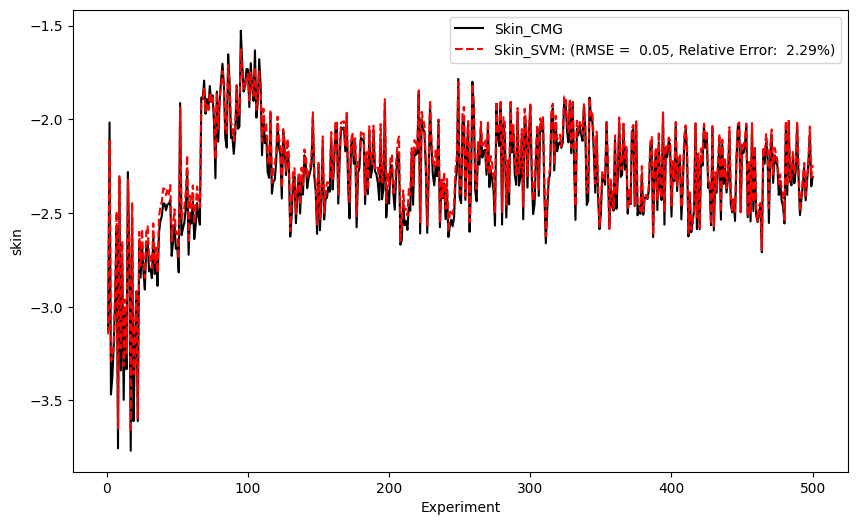

In [42]:
fig = plt.figure(figsize= (10, 6))
ax = plt.axes()

rmse_SV = get_rmse(df['skin'], df['Skin_SVM']) 
l2_SV = get_rel_l2_error(df['skin'], df['Skin_SVM']) * 100

ax.plot(x1, y1, 'k-', label = 'Skin_CMG')
ax.plot(x1, y2, 'r--', label = f'Skin_SVM: (RMSE = {rmse_SV: .2f}, Relative Error: {l2_SV: .2f}%)')

ax.legend()
plt.xlabel('Experiment')
plt.ylabel('skin')